<a href="https://colab.research.google.com/github/lianaling/neural-networks-practice/blob/main/LongShortTermMemory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long Short-Term Memory (LSTM)

[Long Short-Term Memory: From Zero to Hero with PyTorch](https://blog.floydhub.com/long-short-term-memory-from-zero-to-hero-with-pytorch/)

## Starter

[Starter code](https://github.com/gabrielloye/LSTM_Sentiment-Analysis/blob/master/LSTM_starter.ipynb)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
input_dim = 5
hidden_dim = 10 # size of hidden state at each time step (+ cell state)
n_layers = 1 # Number of LSTM layers stacked on top of each other

lstm_layer = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)

In [ ]:
batch_size = 1
seq_len = 1

inp = torch.randn(batch_size, seq_len, input_dim)
hidden_state = torch.randn(n_layers, batch_size, hidden_dim)
cell_state = torch.randn(n_layers, batch_size, hidden_dim)
hidden = (hidden_state, cell_state)

In [ ]:
print(f"Input shape: {inp.shape}")
print(f"Hidden shape: ({hidden[0].shape}, {hidden[1].shape})")

Input shape: torch.Size([1, 1, 5])
Hidden shape: (torch.Size([1, 1, 10]), torch.Size([1, 1, 10]))


In [ ]:
out, hidden = lstm_layer(inp, hidden)
print(f"Output shape: {out.shape}")
print(f"Hidden: {hidden}")

Output shape: torch.Size([1, 1, 10])
Hidden: (tensor([[[-0.3462, -0.1440,  0.2058,  0.1699, -0.1973, -0.1195,  0.0247,
           0.1188, -0.6920, -0.0289]]], grad_fn=<StackBackward0>), tensor([[[-0.4555, -1.4273,  0.5158,  0.4372, -0.6880, -0.2065,  0.1680,
           0.7552, -1.0719, -0.1585]]], grad_fn=<StackBackward0>))


In [ ]:
seq_len = 3
inp = torch.rand(batch_size, seq_len, input_dim)
out, hidden = lstm_layer(inp, hidden)
print(f"Output shape: {out.shape} --> (Batch Size, Sequence Length, Hidden Dimensions)")

Output shape: torch.Size([1, 3, 10]) --> (Batch Size, Sequence Length, Hidden Dimensions)


In [ ]:
out

tensor([[[-0.1011, -0.3149,  0.1685,  0.1140, -0.2039, -0.2269,  0.0932,
           0.1872, -0.3262, -0.0882],
         [-0.0504, -0.2479,  0.1364,  0.1001, -0.1065, -0.2993,  0.1795,
           0.1695, -0.1148, -0.0837],
         [-0.0394, -0.1885,  0.1412,  0.1148, -0.0919, -0.3534,  0.1870,
           0.1501, -0.0287, -0.0756]]], grad_fn=<TransposeBackward0>)

2nd dimension = output of each time step, can be fed into a FC layer
<br />
3rd dimension = fed into a classifier for text classification tasks

[Flatten, Reshape, And Squeeze Explained](https://deeplizard.com/learn/video/fCVuiW9AFzY)

In [ ]:
# Extracting the last output in the sequence
last_out = out.squeeze()[-1,:]
(last_out.shape, last_out)

(torch.Size([10]),
 tensor([-0.0394, -0.1885,  0.1412,  0.1148, -0.0919, -0.3534,  0.1870,  0.1501,
         -0.0287, -0.0756], grad_fn=<SliceBackward0>))

In [ ]:
last_out2 = out[0,-1,:]
(last_out2.shape, last_out2)

(torch.Size([10]),
 tensor([-0.0394, -0.1885,  0.1412,  0.1148, -0.0919, -0.3534,  0.1870,  0.1501,
         -0.0287, -0.0756], grad_fn=<SliceBackward0>))

In [ ]:
# Extracting the 2nd output in the sequence
second_out = out[0,1,:]
(second_out.shape, second_out)

(torch.Size([10]),
 tensor([-0.0504, -0.2479,  0.1364,  0.1001, -0.1065, -0.2993,  0.1795,  0.1695,
         -0.1148, -0.0837], grad_fn=<SliceBackward0>))

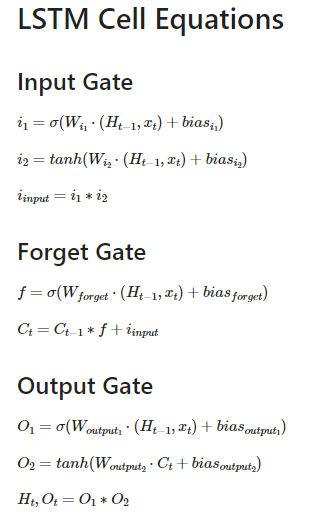

## Sentiment Analysis With Amazon Reviews

[Sentiment Analysis](https://github.com/gabrielloye/LSTM_Sentiment-Analysis/blob/master/main.ipynb)

In [ ]:
import bz2
from collections import Counter
import re
import nltk
import numpy as np

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\liana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\liana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data Preprocessing

[Amazon Reviews on Kaggle](https://www.kaggle.com/datasets/bittlingmayer/amazonreviews?resource=download)

In [ ]:
train_file = bz2.BZ2File('./LongShortTermMemory/amazon_reviews/train.ft.txt.bz2')
test_file = bz2.BZ2File('./LongShortTermMemory/amazon_reviews/test.ft.txt.bz2')

In [ ]:
train_file = train_file.readlines()
test_file = test_file.readlines()

In [ ]:
print(f"Number of training reviews: {str(len(train_file))}")
print(f"Number of test reviews: {str(len(test_file))}")

Number of training reviews: 3600000
Number of test reviews: 400000


In [ ]:
num_train = 16
num_test = 4

train_file = [x.decode('utf-8') for x in train_file[:num_train]]
test_file = [x.decode('utf-8') for x in test_file[:num_test]]

In [ ]:
train_file[0]

'__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n'

In [ ]:
# Extracting labels from sentence

train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file] # First token on whitespace split is label
train_sentences = [x.split(' ', 1)[1].lower() for x in train_file]

test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file]
test_sentences = [x.split(' ', 1)[1].lower() for x in test_file]

In [ ]:
# Cleaning data

def clean_data(corpus):
  for s in corpus:
    s = re.sub('\d', '0', s) # Replace all digits with 0
    # Substitute URLs with <url> as it is irrelevant in most cases
    if 'www.' in s or 'http:' in s or 'https:' in s or '.com' in s:
      s = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", s)

In [ ]:
clean_data(train_sentences)
clean_data(test_sentences)

In [ ]:
del train_file, test_file

### Tokenisation

In [ ]:
words = Counter() # Dict to map unique word to occurrence frequencies in corpus

for i, s in enumerate(train_sentences):
  train_sentences[i] = []
  for word in nltk.word_tokenize(str(s)):
    words.update([word.lower()]) # Convert all words to lower case
    train_sentences[i].append(word)

  if i % 20000 == 0:
    print(str(i * 100 / num_train) + "% done")
  
print("100% done")

0.0% done
100% done


In [ ]:
# Remove typos or nonexistent words, remove those with occurrence frequency = 1
words = {k:v for k, v in words.items() if v > 1}

# Sorting words according to frequency in descending order
words = sorted(words , key=words.get, reverse=True)

# Adding padding and unknown tokens to assign an index to them
words = ['_PAD', '_UNK'] + words

# Dictionaries to store word to index mappings and vice versa
word2idx = {o:i for i, o in enumerate(words)}
idx2word = {i:o for i, o in enumerate(words)}

In [ ]:
for i, s in enumerate(train_sentences):
  train_sentences[i] = [word2idx[word] if word in word2idx else word2idx['_UNK'] for word in s]

for i, s in enumerate(test_sentences):
  test_sentences[i] = [word2idx[word.lower()] if word.lower() in word2idx else word2idx['_UNK'] for word in nltk.word_tokenize(s)]

In [ ]:
# Defining a function that either shortens sentences or pads sentences with 0 to a fixed length

def pad_input(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [ ]:
seq_len = 200 # Length to pad/shorten sentences

train_sentences = pad_input(train_sentences, seq_len)
# test_sentences = pad_input(test_sentences, seq_len)

In [ ]:
test_sentences = pad_input(test_sentences, seq_len)

In [ ]:
# Convert labels into np arrays

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
# Validation data

split_frac = 0.5
split_id = int(split_frac * len(test_sentences))
val_sentences, test_sentences = test_sentences[:split_id], test_sentences[split_id:]
val_labels, test_labels = test_labels[:split_id], test_labels[split_id:]

In [ ]:
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 3050 Ti Laptop GPU'

### Neural Network

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(torch.from_numpy(train_sentences), torch.from_numpy(train_labels))
val_data = TensorDataset(torch.from_numpy(val_sentences), torch.from_numpy(val_labels))
test_data = TensorDataset(torch.from_numpy(test_sentences), torch.from_numpy(test_labels))

batch_size = 2

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [ ]:
for i, l in train_loader:
  print(i.squeeze().shape, l.shape)
  break

torch.Size([2, 200]) torch.Size([2])


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [ ]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print(sample_x.shape, sample_y.shape)

torch.Size([2, 200]) torch.Size([2])


We will train our own word embedding in the first layer.

In [ ]:
import torch.nn as nn

[`torch.nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)
<br />
[`torch.nn.LSTM`](https://pytorch.org/docs/stable/generated/torch.nn.LSTM)
<br />
[`torch.nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.LSTM)
<br />
[`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear)
<br />
[`torch.nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid)
<br />
[Why use `batch_first=True`?](https://stackoverflow.com/questions/63822152/pytorch-rnn-is-more-efficient-with-batch-first-false)
<br />
[Pytorch: how and when to use Module, Sequential, ModuleList and ModuleDict](https://towardsdatascience.com/pytorch-how-and-when-to-use-module-sequential-modulelist-and-moduledict-7a54597b5f17)
<br />
[PyTorch - What does contiguous() do?](https://stackoverflow.com/questions/48915810/pytorch-what-does-contiguous-do)
<br />
[When to initialize LSTM hidden state?](https://discuss.pytorch.org/t/when-to-initialize-lstm-hidden-state/2323/20)
<br />
[Initialization of first hidden state in LSTM and truncated BPTT](https://discuss.pytorch.org/t/initialization-of-first-hidden-state-in-lstm-and-truncated-bptt/58384/10)

In [ ]:
from collections import OrderedDict

class CustomSentimentNet(nn.Module):
  # How many layers are needed?
  # L1: embedding layer to train word embeddings ourselves
  # L2: embeddings are passed into this LSTM layer for the main processing
  # L3: outputs of the LSTM layer are extracted then passed into the dropout layer to prevent overfitting
  # L4: regularized outputs are passed into a FC layer to make predictions
  # L5: outputs are transformed by a sigmoid layer for classification

  # What kind of inputs are needed? (For must include params)
  
  # Embedding
  # Vocab size: to set the embedding dict size
  # Embedding dimensions: to set the embedding vector size

  # LSTM
  # Input size: no. of features in input (embedding size)
  # Hidden size: no. of features in the hidden state
  # Number of layers: stacked on top of each other
  # Batch first = True
  # Dropout: dropout probability

  # Dropout
  # p: dropout probability
  
  # Linear
  # Input features: each input sample size
  # Output features: each output sample size

  # Sigmoid
  # No param

  # First implementation without Sequential

  def __init__(self, vocab_size, embed_size, hidden_size, output_size, n_layers, drop_prob=0.5):
    super(CustomSentimentNet, self).__init__()
    self.output_size = output_size
    self.n_layers = n_layers
    self.hidden_size = hidden_size

    self.embedding = nn.Embedding(vocab_size, embed_size)
    self.lstm = nn.LSTM(embed_size, hidden_size, n_layers, dropout=drop_prob, batch_first=True)
    self.dropout = nn.Dropout(0.2)
    self.fc = nn.Linear(hidden_size, output_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x, hidden):
    batch_size = x.size(0)
    x = x.long()

    embeds = self.embedding(x)
    lstm_out, hidden = self.lstm(embeds, hidden)
    lstm_out = lstm_out.contiguous().view(-1, self.hidden_size) 
    # Reshaping tensor to fit in the next FC layer
    # For tensor (N, K), only reshape K 
    # Because only K needs to be equal to the input size 
    # When doing matrix multiplcation
    # See FeedforwardNeuralNetwork.ipynb under section Build NN for more details

    # contiguous(): rearrange the memory allocation
    # So that it aligns with the metadata (element order)

    out = self.dropout(lstm_out) # Doesn't change tensor shape so no need reshape
    out = self.fc(out)
    out = self.sigmoid(out)

    out = out.view(batch_size, -1)
    out = out[:, -1]
    return out, hidden
  
  def init_hidden(self, batch_size):
    weight = next(self.parameters()).data
    hidden = (weight.new(self.n_layers, batch_size, self.hidden_size).zero_().to(device), # Hidden state
              weight.new(self.n_layers, batch_size, self.hidden_size).zero_().to(device) # Cell state
              )
    # If omitted, default also initialises hidden with zeros.
    # If zeros, no need detaching.
    
    return hidden

In [ ]:
class CustomSentimentNetSequential(nn.Module):
  # Second implementation with Sequential

  def __init__(self, vocab_size, embed_size, hidden_size, output_size, n_layers, drop_prob=0.5):
    super(CustomSentimentNetSequential, self).__init__()
    self.output_size = output_size
    self.n_layers = n_layers
    self.hidden_size = hidden_size

    self.embedding = nn.Embedding(vocab_size, embed_size)
    self.lstm = nn.LSTM(embed_size, hidden_size, n_layers, dropout=drop_prob, batch_first=True)

    self.decoder = nn.Sequential(OrderedDict([
                                              ("dropout", nn.Dropout(0.2)),
                                              ("fc", nn.Linear(hidden_size, output_size)),
                                              ("sigmoid", nn.Sigmoid())
    ]))

  def forward(self, x, hidden):
    batch_size = x.size(0)
    x = x.long()

    embeds = self.embedding(x)
    lstm_out, hidden = self.lstm(embeds, hidden)
    lstm_out = lstm_out.contiguous().view(-1, self.hidden_size) 
    # Reshaping tensor to fit in the next FC layer
    # For tensor (N, K), only reshape K 
    # Because only K needs to be equal to the input size 
    # When doing matrix multiplcation
    # See FeedforwardNeuralNetwork.ipynb under section Build NN for more details

    # contiguous(): rearrange the memory allocation
    # So that it aligns with the metadata (element order)

    out = self.decoder(lstm_out)

    out = out.view(batch_size, -1)
    out = out[:, -1]
    return out, hidden
  
  def init_hidden(self, batch_size):
    weight = next(self.parameters()).data
    hidden = (weight.new(self.n_layers, batch_size, self.hidden_size).zero_().to(device),
              weight.new(self.n_layers, batch_size, self.hidden_size).zero_().to(device)
              )
    
    return hidden

In [ ]:
class SentimentNet(nn.Module):
  def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5) -> None:
    super(SentimentNet, self).__init__()
    self.output_size = output_size
    self.n_layers = n_layers
    self.hidden_dim = hidden_dim

    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
    self.dropout = nn.Dropout(0.2)
    self.fc = nn.Linear(hidden_dim, output_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x, hidden):
    batch_size = x.size(0)
    x = x.long()
    embeds = self.embedding(x)
    lstm_out, hidden = self.lstm(embeds, hidden)
    lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

    out = self.dropout(lstm_out)
    out = self.fc(out)
    out = self.sigmoid(out)

    out = out.view(batch_size, -1)
    out = out[:,-1]
    return out, hidden

  def init_hidden(self, batch_size):
    weight = next(self.parameters()).data
    hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
              weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
    return hidden

In [ ]:
vocab_size = len(word2idx) + 1
output_size = 1 # Either 1 or 0
embedding_dim = 2
hidden_dim = 512
n_layers = 2

model = CustomSentimentNetSequential(vocab_size, embedding_dim, hidden_dim, output_size, n_layers)
model.to(device)
print(model)

CustomSentimentNetSequential(
  (embedding): Embedding(215, 2)
  (lstm): LSTM(2, 512, num_layers=2, batch_first=True, dropout=0.5)
  (decoder): Sequential(
    (dropout): Dropout(p=0.2, inplace=False)
    (fc): Linear(in_features=512, out_features=1, bias=True)
    (sigmoid): Sigmoid()
  )
)


In [ ]:
lr = 0.005
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

`state_dict` = model weights in Pytorch. Can be loaded into a model with same architecture in a different script.

[How can I fix "ValueError: Target size (torch.Size([128])) must be the same as input size (torch.Size([128, 1]))" error?](https://stackoverflow.com/questions/65458509/how-can-i-fix-valueerror-target-size-torch-size128-must-be-the-same-as-i)

In [ ]:
epochs = 2
counter = 0
print_every = 1
clip = 5 # Prevent exploding gradient
valid_loss_min = np.Inf

model.train()
for i in range(epochs):
  h = model.init_hidden(batch_size)

  for inputs, labels in train_loader:
    counter += 1
    h = tuple([e.data for e in h])
    inputs, labels = inputs.to(device), labels.to(device) # Move to device
    model.zero_grad()
    output, h = model(inputs, h)
    loss = criterion(output, labels.float())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), clip)
    optimizer.step()

    if counter % print_every == 0:
      val_h = model.init_hidden(batch_size)
      val_losses = []
      model.eval()
      for inp, lab in val_loader:
        val_h = tuple([each.data for each in val_h])
        inp, lab = inp.to(device), lab.to(device)
        out, val_h = model(inp, val_h)
        val_loss = criterion(out.squeeze(), lab.float())
        val_losses.append(val_loss.item())

        model.train()
        print(f"Epoch: {i + 1}/{epochs}", end=" ")
        print(f"Step: {counter}...", end=" ")
        print(f"Loss: {loss.item():.6f}...", end=" ")
        print(f"Val Loss: {np.mean(val_losses):.6f}...")

        if np.mean(val_losses) <= valid_loss_min:
          torch.save(model.state_dict(), './LongShortTermMemory/state_dict.pt')
          print(f"Validation loss decreased: ({valid_loss_min:.6f} --> {np.mean(val_losses):.6f})")
          valid_loss_min = np.mean(val_losses)


Epoch: 1/2 Step: 1... Loss: 0.720249... Val Loss: 0.357158...
Validation loss decreased: (inf --> 0.357158)
Epoch: 1/2 Step: 2... Loss: 0.754341... Val Loss: 0.644065...
Epoch: 1/2 Step: 3... Loss: 0.647314... Val Loss: 0.582035...
Epoch: 1/2 Step: 4... Loss: 0.684829... Val Loss: 0.522448...
Epoch: 1/2 Step: 5... Loss: 0.760815... Val Loss: 0.447348...
Epoch: 1/2 Step: 6... Loss: 0.604214... Val Loss: 0.571272...
Epoch: 1/2 Step: 7... Loss: 0.844182... Val Loss: 0.575474...
Epoch: 1/2 Step: 8... Loss: 0.898300... Val Loss: 0.411876...
Epoch: 2/2 Step: 9... Loss: 1.005435... Val Loss: 2.252388...
Epoch: 2/2 Step: 10... Loss: 0.530621... Val Loss: 2.059506...
Epoch: 2/2 Step: 11... Loss: 2.622728... Val Loss: 0.166789...
Validation loss decreased: (0.357158 --> 0.166789)
Epoch: 2/2 Step: 12... Loss: 1.408206... Val Loss: 0.634879...
Epoch: 2/2 Step: 13... Loss: 1.175733... Val Loss: 0.788344...
Epoch: 2/2 Step: 14... Loss: 0.202716... Val Loss: 0.208053...
Epoch: 2/2 Step: 15... Loss: 1

In [ ]:
# Loading the best model
model.load_state_dict(torch.load('./LongShortTermMemory/state_dict.pt'))

<All keys matched successfully>

In [ ]:
test_losses = []
num_correct = 0
h = model.init_hidden(batch_size)

model.eval()
for inputs, labels in test_loader:
  h = tuple([each.data for each in h])
  inputs, labels = inputs.to(device), labels.to(device)
  output, h = model(inputs, h)
  test_loss = criterion(output.squeeze(), labels.float())
  test_losses.append(test_loss.item())
  pred = torch.round(output.squeeze()) # Round output to 0/1
  correct_tensor = pred.eq(labels.float().view_as(pred))
  correct = np.squeeze(correct_tensor.cpu().numpy())
  num_correct += np.sum(correct)

print(f"Test loss: {np.mean(test_losses):.3f}")
test_acc = num_correct/len(test_loader.dataset)
print(f"Test accuracy: {test_acc * 100:.3f}")

Test loss: 1.103
Test accuracy: 50.000
